In [1]:
## CAUTION: this packet is mandatory for Twint working ##

import nest_asyncio
nest_asyncio.apply()

# rest of the code
import twint
import pandas as pd
import preprocessor as p
import re
import string

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
import seaborn as sns

import os 

import numpy as np

import nltk
import sklearn
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import f1_score
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Thibaud\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Thibaud\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Tweet Scrapping 

In [21]:
def tweet_scrap(movie_name):
    
    c = twint.Config()
    #c.Username = "apple"
    c.Search =  "#{}".format(movie_name)
    #c.Search =  "#Mandalorien"
    c.Format = "Username: {username} |  Tweet: {tweet}"
    c.Lang = "en"
    c.Limit = 400
    c.Store_csv = True 
    ## Custom the output ##
    c.Custom["Tweet"] = ["tweet"]
    #c.Custom["Date"] = ["date"]

    c.Output = "{}.csv".format(movie_name)
    #c.Pandas = True
    twint.run.Search(c)

## Tweet cleaning - Preprocess 

In [3]:
def Clean(dataframe):
    #Remove non ASCII characters:
    dataframe = dataframe.encode('ascii','ignore')
    dataframe = dataframe.decode('utf8')
    
    #Remove URLs : 
    dataframe = re.sub('http\S+\s*','',dataframe)  
    
    
    #removing mentions:
    dataframe = re.sub('rt|cc','',dataframe) #Remove RT and cc
    dataframe = re.sub('#\S+','',dataframe) #Remove hashtags
    
    dataframe = dataframe.lower() #Converting to lowercase
    #dataframe = re.sub(r'\d+', '', dataframe) #Removing numbers
    dataframe = re.sub(r'[^a-zA-Z0-9\s]', '', dataframe) #Removing punctuations
    dataframe = dataframe.strip() #remove white spaces
    dataframe = re.sub('pictw\S+\s*','',dataframe)
    
    #Tokenize: 
    word_tokens = word_tokenize(dataframe)
    
    #Words stops
    stop_words=set(stopwords.words('english'))

    filtered_tweet = []
    filtered_tweet = [w for w in word_tokens if not w in stop_words]
     
    return ' '.join(filtered_tweet)

In [4]:
#df_tweet_clean = df_tweet['tweet'].apply(Clean)
#preproctest(df_tweet)

## Sentiment  Prediction with TextBlob

In [5]:
from textblob import TextBlob
from IPython.display import Markdown, display
# Pretty printing the result
def printmd(string, color=None):
    colorstr = "<span style='color:{}'>{}</span>".format(color, string)
    display(Markdown(colorstr))
    
def Senti_Blob(df_tweet_clean):
    
    senti_blob = []
    for tweet in df_tweet_clean:
        #print(tweet)
        analysis = TextBlob(tweet)
        #print(analysis.sentiment)
        #senti.append(analysis.sentiment)
        if analysis.sentiment[0]>0:
            #printmd('Positive', color="green")
            senti_blob.append('positive')
        elif analysis.sentiment[0]<0:
            #printmd('Negative', color="red")
            senti_blob.append('negative')
        else:
            #printmd("Neutre", color="grey")
            senti_blob.append('neutre')
            #print("")

    File_sentiblob = {'Tweet': df_tweet_clean,
            'Sentiment': senti_blob,
           }

    df_sentiblob = pd.DataFrame(File_sentiblob, columns= ['Tweet', 'Sentiment'])
    
    return df_sentiblob

In [6]:
#df_tweet['tweet'].count()

In [7]:
#File_sentiblob = {'Tweet': df_tweet_clean,
#            'Sentiment': senti_blob,
#           }

#df_sentiblob = pd.DataFrame(File, columns= ['Tweet', 'Sentiment'])
#df_sentiblob   

## Predicted Emotion Analyses  

In [8]:
#df_sentiblob.count()

In [9]:
#sns.countplot(x='Sentiment',data=df_sentiblob)

In [10]:
#count_sentiblob = df_sentiblob.groupby("Sentiment", sort='count').size().reset_index(name='count')
#print('\n Sentiment with Sentiblob: \n\n', count_sentiblob)

# Classifier

### Naive Bayes :

In [11]:
def NB(X_train, X_test, Y_train):

    # fit the training dataset on the NB classifier
    Naive = MultinomialNB()
    Naive.fit(X_train, Y_train)

    # predict the labels on validation dataset
    predictions_NB = Naive.predict(X_test)
    
    #print(predictions_NB)
    print(f"\n NB CLASSIFIER: \n emotion positive : {list(predictions_NB).count('positive')} , negative : {list(predictions_NB).count('negative')} , neutral : {list(predictions_NB).count('neutral')} " )
    return predictions_NB

### SVM :

In [12]:
def SVM(X_train, X_test, Y_train):
    
    SVM = SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
    SVM.fit(X_train, Y_train)

    # predict the labels on validation dataset
    predictions_SVM = SVM.predict(X_test)

    #print(predictions_SVM)
    print(f"\n SVM CLASSIFIER: \n emotion positive : {list(predictions_SVM).count('positive')} , negative : {list(predictions_SVM).count('negative')} , neutral : {list(predictions_SVM).count('neutral')}" )
    return predictions_SVM 

### Random Forest Classifier

In [13]:
def RFC(X_train, X_test, Y_train):
    
    RFC = RandomForestClassifier(n_estimators=1000, random_state=0)
    RFC.fit(X_train, Y_train)

    # predict the labels on validation dataset
    predictions_RFC = RFC.predict(X_test)

    print(f"\n RFC CLASSIFIER: \n emotion positive : {list(predictions_RFC).count('positive')} , negative : {list(predictions_RFC).count('negative')}, neutral : {list(predictions_RFC).count('neutral')} " )
    return predictions_RFC 

### Logistic Regression

In [14]:
def LR(X_train, X_test, Y_train ):
    
    logreg = LogisticRegression(solver='liblinear', multi_class='auto')
    logreg.fit(X_train, Y_train)

    # predict the labels on validation dataset
    predictions_LR = logreg.predict(X_test)

    print(f"\n Logistic Regression CLASSIFIER: \n emotion positive : {list(predictions_LR).count('positive')} , negative : {list(predictions_LR).count('negative')} , neutral : {list(predictions_LR).count('neutral')}" )
    return predictions_LR 

# API

In [25]:
def Api(movie_name):
    tweet_scrap(movie_name)  ### A commenter pour juste prendre les csv pre enregistres
    df_tweet = pd.read_csv("{}.csv".format(movie_name))
    df_tweet_clean = df_tweet['tweet'].apply(Clean)
    #Senti_Blob(df_tweet_clean)
    df_sentiment_blob = Senti_Blob(df_tweet_clean)
    print('\n \n')
    print(df_sentiment_blob)
    
    count_senti = df_sentiment_blob.count()
    print('\n \n')
    print('Total number of tweet: \n',count_senti)
    
    sns.countplot(x='Sentiment', data=df_sentiment_blob)
    
    count_sentiblob = df_sentiment_blob.groupby("Sentiment", sort='count').size().reset_index(name='count')
    print('\n #####  Sentiment with Sentiblob: ###### \n\n', count_sentiblob)
    
    ## Pourcentage 
    
    nb_tot = df_sentiment_blob['Sentiment'].shape[0]
    positive_sentiblob = list(df_sentiment_blob['Sentiment']).count('positive')
    negative_sentiblob = list(df_sentiment_blob['Sentiment']).count('negative')
    neutral_sentiblob = list(df_sentiment_blob['Sentiment']).count('neutre')

    print('\n percent of positive:', (positive_sentiblob/nb_tot)*100)
    print( '\n percent of negative:', (negative_sentiblob/nb_tot)*100)
    print('\n percent of neutre:', (neutral_sentiblob/nb_tot)*100)
    
    
    #### PLOT pourcent Senti BLOB ##
    
    labels = ['positive', 'neutral', 'negative']
    pred_NB = [(positive_sentiblob/nb_tot)*100, (neutral_sentiblob/nb_tot)*100, (negative_sentiblob/nb_tot)*100 ]
    

    x = np.arange(len(labels))  # the label locationsc
    width = 0.45  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x , pred_NB, width)
   
    
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Percent')
    ax.set_title('Sentiment Percentage Prediction with SentiBlob')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)

    fig.tight_layout()

    plt.show()
    
    #######################################
    
    
    data_clean = df_tweet_clean
    
    ## Training file
    train_data = pd.read_csv('train.csv', encoding='utf-8')
    train_data = train_data[['Category', 'Tweet']]
    train_data.rename(columns={'Category': 'emotion'}, inplace=True)
    train_data = train_data[train_data['emotion'] != 'Tweet']
    train_data = train_data[train_data['Tweet'] != "Not Available"]
    train_data_clean = train_data['Tweet'].apply(Clean)
    
    
    sns.countplot(x='emotion',data=train_data)
    
    #Vectorizer : 
    count_vectorizer = CountVectorizer()
    X_train = count_vectorizer.fit_transform(train_data_clean)
    Y_train = train_data['emotion']
    X_test = count_vectorizer.transform(data_clean)

    #print(X_train.shape, Y_train.shape, X_test.shape)
    
    print('\n #####  Sentiment Prediction with CLASSIFIER : ###### \n\n')
    
    ## Classifier ####
    
    predictions_NB = NB(X_train, X_test, Y_train)
    predictions_SVM = SVM(X_train, X_test, Y_train)
    predictions_RFC = RFC(X_train, X_test, Y_train)
    predictions_LR = LR(X_train, X_test, Y_train)
    
    ### Percent calcul
    nb_NB = predictions_NB.shape[0]
    positive_NB = list(predictions_NB).count('positive')
    negative_NB = list(predictions_NB).count('negative')
    neutral_NB = list(predictions_NB).count('neutral')
    
    positive_NBp = (positive_NB/nb_NB)*100
    negative_NBp = (negative_NB/nb_NB)*100
    neutral_NBp = (neutral_NB/nb_NB)*100
    
    print("\n NB :")
    print( 'Positive:', positive_NBp, '\n Negative:', negative_NBp, '\n Neutre:', neutral_NBp)

    nb_SVM = predictions_SVM.shape[0]
    positive_SVM = list(predictions_SVM).count('positive')
    negative_SVM = list(predictions_SVM).count('negative')
    neutral_SVM = list(predictions_SVM).count('neutral')
    
    positive_SVMp = (positive_SVM/nb_SVM)*100
    negative_SVMp = (negative_SVM/nb_SVM)*100
    neutral_SVMp = (neutral_SVM/nb_SVM)*100
    
    print("\n SVM :")
    print( 'Positive:', positive_SVMp , '\n Negative:', negative_SVMp , '\n Neutre:', neutral_SVMp)
    
    nb_RFC = predictions_RFC.shape[0]
    positive_RFC = list(predictions_RFC).count('positive')
    negative_RFC = list(predictions_RFC).count('negative')
    neutral_RFC = list(predictions_RFC).count('neutral')
    
    
    positive_RFCp = (positive_RFC/nb_RFC)*100
    negative_RFCp = (negative_RFC/nb_RFC)*100
    neutral_RFCp = (neutral_RFC/nb_RFC)*100
    
    print("\n RFC :")
    print( 'Positive:', positive_RFCp, '\n Negative:', negative_RFCp, '\n Neutre:', neutral_RFCp)

    nb_LR = predictions_LR.shape[0]
    positive_LR = list(predictions_LR).count('positive')
    negative_LR = list(predictions_LR).count('negative')
    neutral_LR = list(predictions_LR).count('neutral')
    
    positive_LRp = (positive_LR/nb_LR)*100
    negative_LRp = (negative_LR/nb_LR)*100
    neutral_LRp = (neutral_LR/nb_LR)*100
    
    
    print("\n LR :")
    print( 'Positive:', positive_LRp, '\n Negative:', negative_LRp, '\n Neutre:', neutral_LRp)
    

    aver_pos = (((positive_NB/nb_NB)+(positive_SVM/nb_SVM)+(positive_LR/nb_LR))/3)*100
    aver_neg = (((negative_NB/nb_NB)+(negative_SVM/nb_SVM)+(negative_LR/nb_LR))/3)*100
    aver_neut = (((neutral_NB/nb_NB)+(neutral_SVM/nb_SVM)+(neutral_LR/nb_LR))/3)*100
   
    print("\n\n Average :")
    print( '\n Positive:', aver_pos, '\n Negative:',aver_neg, '\n Neutre:', aver_neut)
    
    
    
    #### PLOT  CLASSIFIER COMPARAISON  ####
    
    labels = ['positive', 'negative', 'neutral']
    pred_NB = [positive_NBp, negative_NBp, neutral_NBp]
    pred_SVM = [positive_SVMp, negative_SVMp, neutral_SVMp]
    pred_RFC = [positive_RFCp, negative_RFCp, neutral_RFCp]
    pred_LR = [positive_LRp, negative_LRp, neutral_LRp]

    x = np.arange(len(labels))  # the label locationsc
    width = 0.45  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, pred_NB, width/4, label='NB')
    rects2 = ax.bar(x - width/4, pred_SVM, width/4, label='SVM')
    rects3 = ax.bar(x + width/2, pred_RFC, width/4, label='RFC')
    rects4 = ax.bar(x + width/4, pred_LR, width/4, label='LR')
    
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Percent')
    ax.set_title('Sentiment Percentage Prediction for each classifier')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    fig.tight_layout()

    plt.show()
    
    
    return aver_pos
     #### PLOT  AVERAGE  ####
       
    
    
    ## IMDb COMPARAISON ###

CRITICAL:root:twint.run:Twint:Feed:noDataExpecting value: line 1 column 1 (char 0)
CRITICAL:root:twint.run:Twint:Feed:noDataExpecting value: line 1 column 1 (char 0)


Username: Kristyn_E_Start |  Tweet: Just painted a gaggle of #hobgoblins I might do multiple #giveaways this day to share these. I ordered what I thought was each but they were multiplied sets? I don't need a hobgoblin army you guys.😲
Username: mondoheather |  Tweet: Found a wad of spit on my car windshield this morning, capping off a week that has been a bit of a bummer. BUT...my spirits are good, since I have the MC from Club Scum as my guide! 😍 #Clubscum #darannorris #hobgoblins  pic.twitter.com/HMeDRTLobf
Username: maclambra |  Tweet: Rule of Law: One set of rules for us, a different set for you. #consistency #hobgoblins #SmallMinds
Username: ManyEyesWoman |  Tweet: I agree BUT👉 under the uniquely insane circumstances wrought by Trump and his hoard of #Racist #Hobgoblins, it is essential we win the 2020 no matter what or we are ALL lost. #WhateverItTakes #JustDoIt #VoteBlueNoMatterWho pic.twitter.com/DYFm3wB30d
Username: daylightpub1066 |  Tweet: Without this guy's amazing work - b

Username: mulderist |  Tweet: “Ennh...my sunken chest and string-beany arms.” #MST3K #Hobgoblins
Username: inkstand |  Tweet: #happinessis knowing #BikiniAcademy aka #BabewatchTheForbiddenParody is on #amazonprime . #RickSloane #viceacademy #Hobgoblins #usaupallnight  https://www.instagram.com/p/B1u-QXLJxzZ/?igshid=1q5e3iya6b8bl …
Username: taryn_tyler |  Tweet: Stepping into the unknown in search of her missing Grandmother. . . . . . #darkfairytales #darkromance #grimmsbrothers #grimmsfairytales #fairytales #gothicnovels #ghoststories #weres #hobgoblins #woodland…  https://www.instagram.com/p/B1SYAZ9AOiJ/?igshid=1c9jg18er9zq1 …
Username: WendyLBooks |  Tweet: #WritingCommunity, on my author's blog today, I wrote about proofreading, that unglamorous, trickster task. # https://www.wendyledgerauthor.com/reflections/2019/8/11/the-importance-of-proofreading #amwriting #amediting #hobgoblins #thewritingprocess #bookcreation pic.twitter.com/NBUvy2pfK6
Username: ClewisMy |  Tweet: That #jackh

Username: JoyParry13 |  Tweet: #FolkloreThursday  Many cultures have household deities that resemble gnomes or elves - such as the Anglo-Saxon #Cofgodas & #Hobs (#hobgoblins), Slavic #Domovoy & Anglo-Scottish #Brownies ..... could these be the origins of #SnowWhiteAndTheDwarves? pic.twitter.com/04eQn1FFGZ
Username: MDK17011 |  Tweet: Goodnight horror fam. Watch out for Furry things on Reputation Road.   #HobGoblins #FrightClub
Username: MDK17011 |  Tweet: Other "hits" from this director include many of the Vice Academy movies and Bikini Academy. I'm beginning to think this guy didn't graduate. 😕 #HobGoblins #FrightClub
Username: MDK17011 |  Tweet: A ROCK OUT WITH YOUR HOBGOBLIN OUT end credits JAM! #HobGoblins #FrightClub
Username: BoobPunchTina |  Tweet: That was silly and cute and I really enjoyed it Especially the surprisingly excellent band Thanks for the riffing, everyone! #Hobgoblins #FrightClub
Username: MDK17011 |  Tweet: Cocaine, puppets, and bad ideas. 👈 The '80s   #HobGoblin

Username: MDK17011 |  Tweet: 🎵 And another one bites the dust 🎵 #HobGoblins #FrightClub
Username: MDK17011 |  Tweet: So there is an MST3K and an Elvira version of this movie. Must mean its "good" 😕 #HobGoblins #FrightClub
Username: kathleenh42 |  Tweet: Inefficient staff: THE MOVIE! #Hobgoblins #FrightClub pic.twitter.com/fqVnrcBF0n
Username: MyFavGhost |  Tweet: Watching #Hobgoblins with #FrightClub tonight 🖤🖤🖤🖤🖤
Username: kathleenh42 |  Tweet: God, Dennis, get it together! #HobGoblins #FrightClub pic.twitter.com/0DyDLRx7Lu
Username: BoobPunchTina |  Tweet: Hobnobbing with #Hobgoblins and #FrightClub pic.twitter.com/NJJvGETF4n
Username: MDK17011 |  Tweet: Not to be confused with KnobGoblin which may be the porno version #FrightClub #HobGoblins
Username: MarkLBristow |  Tweet: @jonahray Just learned about a modern indi band called The Fontanelles, and they're being trolled on Youtube over Hobgoblins. These guys, who are super sincere in their music, are going "What the hell is Kiss Kic

CRITICAL:root:twint.run:Twint:Feed:noDataExpecting value: line 1 column 1 (char 0)
CRITICAL:root:twint.run:Twint:Feed:noDataExpecting value: line 1 column 1 (char 0)
CRITICAL:root:twint.run:Twint:Feed:noDataExpecting value: line 1 column 1 (char 0)


Username: saleintothe90s |  Tweet: I just suddenly remembered this .gif. She was every #mst3k fan's icon on Live Journal back in like, 2004. #hobgoblins  pic.twitter.com/9t2mDqMrzN
Username: okumarts |  Tweet: The first Pledge Goal has been reached on the Okumarts Games Patreon.Thanks for the boost @OldSchoolDM #dnd #savageworlds #hobgoblins #dndminiatures #patreon https://www.patreon.com/posts/hobgoblin-part-23965824 …
Username: TheNeuroTimes |  Tweet: This question is a very good one to which I have no answer whatsoever. I would also like to know why a KO in boxing is treated differently from a KO in hockey or football in terms of returning to practice etc. #consistency #hobgoblins
Username: JimSistare |  Tweet: #Hobgoblins, always and forever.  Hobgoblins.
Username: inkstand |  Tweet: Highlight of 2018 @vinegarsyndrome Blu-ray release of #BloodTheater aka #MovieHouseMassacre with bonus feature #Visitants, early films by #RickSloane . He's know  mostly for #Hobgoblins ,…  https://www

Username: mookiepercy |  Tweet: I don't #know how we are #getting out of this #battle 5 #giants 4 #hobgoblins 1 #wyvern  & #boss #guh #epicbattle #dungeonsanddragons @ Gatewood Park Apartments  https://www.instagram.com/p/Bko4x3DHAsr/?utm_source=ig_twitter_share&igshid=1e976rrw6ygiw …
Username: AlchemyLeads |  Tweet: RT @aesopstheatre: Today is the dress rehearsal for 'The Lovers' our children's play based on A Midsummer Night's Dream' complete with live music: trumpet and flute! #play #openair #theatre #fairies #hobgoblins #elves #storytelling #myths #Parties #Child… pic.twitter.com/GemFavL5rx
Username: aesopstheatre |  Tweet: Today is the dress rehearsal for 'The Lovers' our children's play based on A Midsummer Night's Dream' complete with live music: trumpet and flute! #play #openair #theatre #fairies #hobgoblins #elves #storytelling #myths #Parties #Children pic.twitter.com/mqK99hhkJ9
Username: TheGloriousSOB |  Tweet: What's on #UniMás? #TheCounselor. Now that #MST3K ain't on #com

Username: LindsayFallows1 |  Tweet: Day 285 of my photo challenge #streetart #graffitiart #mural #artist #illustrator #urbanart #modernart #photoart #buildingart #danlish @danlish1 #girlsbestfriend #hobgoblins #devilonmyshoulder #creature #pink #hair #girl #sad #strong #fitness #fitnessgir…  http://ift.tt/2sDJ4a6  pic.twitter.com/qHnx4zofv1
Username: mulderist |  Tweet: “Hi, our special tonight is Poached Go-To-Hell.” #MST3K #Hobgoblins
Username: sophieparkii |  Tweet: So so excited for tonight 💃🏻 #hobgoblins
Username: jgitchell |  Tweet: Important context: the #TPSAC with many of the same members, also denied the #MRTPA for #SwedishMatch's General snus.   #Hobgoblins ?  https://twitter.com/ASH_LDN/status/957934095941578754 …
Username: soitistoldcast |  Tweet: #Legendary #creature of the #day:  The #bugbear is a creature originating from #Celtic #lore. Bugbears are #hobgoblins that eat #children, and #parents told stories of bugbears to frighten their disobedient kids. pic.twitter.com/

Username: daskeyzerlein |  Tweet: #Horrorctober - Part 1: My ★½ review of #Hobgoblins (1988) on @letterboxd:  https://boxd.it/kw8ih 
Username: shlingdong |  Tweet: "You looked PATHETIC!" --Compared to that whole SCENE, you mean?!😂 #Hobgoblins #MST3K #WatchComet @ChristineML1 @The_Cinebyte @dewwright4u pic.twitter.com/0ykjgPl20e
Username: shlingdong |  Tweet: Why didn't he just STAY DOWN the first time, ha!?  #Hobgoblins #MST3K #WatchComet #PlanetWestCoast pic.twitter.com/4FrDVuu4zJ
Username: shlingdong |  Tweet: THE ACTION! THE DRAMA! ...WHERE are those #Hobgoblins, again?😆 #MST3K #WatchComet #PlanetWestCoast @ChristineML1 @The_Cinebyte @dewwright4u pic.twitter.com/PicOvWJseM
Username: shlingdong |  Tweet: Got back indoors from today's trash run (+ #BootsyKitty had shown up to be fed)&not only had #SmittyKitty woken, #Hobgoblins started! #MST3K pic.twitter.com/zNOly7fdt1
Username: Therealmanos |  Tweet: "I'd been doing quite a bit of crack that night." I love that line so much. #mst3k 

Username: flowkap |  Tweet: #schlefaz Ready for #Hobgoblins! Hell yeah :D
Username: AlexanderBausE |  Tweet: Alright lets go! #schlefaz #hobgoblins
Username: clarkey01 |  Tweet: A few jobs for a Friday night #Hobgoblins  pic.twitter.com/5k7PrCF59M
Username: KingDevinJOSEP1 |  Tweet: #Hobgoblins Hobgoblins are more like Brownies than Goblins; they like to look after children and…  https://www.instagram.com/p/BXEqA9jlGnL/ 
Username: PlentyDreadful |  Tweet: #TodayInHorror - 'Hobgoblins' was released July 14, 1988.   https://youtu.be/o0fhewrzBRM  #Hobgoblins  pic.twitter.com/0Q2MGOxlh7
Username: MidwestMonPod |  Tweet: Hobgoblins hits theaters on this day in 1988.  #hobgoblins #80shorror #horrorislife…  https://www.instagram.com/p/BWhIrxjAH_0/ 
Username: aghjr1 |  Tweet: @ShannonBream MSM trailing #hobgoblins chk the closets, look under the bed, or it could be a #snipe hunt, graveyards 1st choice of both
Username: TheGloriousSOB |  Tweet: #MST3K #cometTV #Hobgoblins C'ing the guy like pho

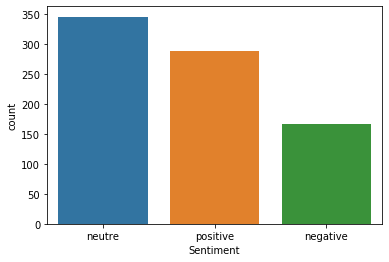

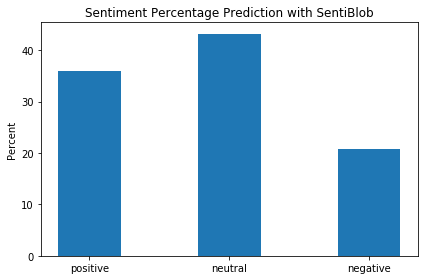


 #####  Sentiment Prediction with CLASSIFIER : ###### 



 NB CLASSIFIER: 
 emotion positive : 546 , negative : 46 , neutral : 208 

 SVM CLASSIFIER: 
 emotion positive : 450 , negative : 108 , neutral : 242

 RFC CLASSIFIER: 
 emotion positive : 716 , negative : 0, neutral : 84 

 Logistic Regression CLASSIFIER: 
 emotion positive : 498 , negative : 48 , neutral : 254

 NB :
Positive: 68.25 
 Negative: 5.75 
 Neutre: 26.0

 SVM :
Positive: 56.25 
 Negative: 13.5 
 Neutre: 30.25

 RFC :
Positive: 89.5 
 Negative: 0.0 
 Neutre: 10.5

 LR :
Positive: 62.25000000000001 
 Negative: 6.0 
 Neutre: 31.75


 Average :

 Positive: 62.25000000000001 
 Negative: 8.416666666666666 
 Neutre: 29.333333333333332


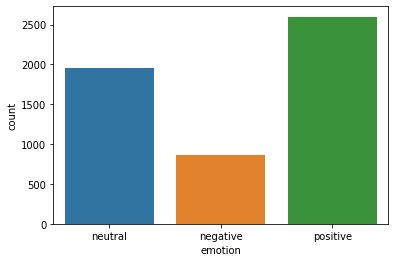

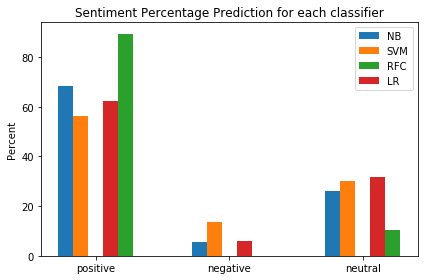

In [42]:
#movie_name = "007spectre"
#movie_name = "avengersendgame"
#movie_name = "peakyblinders"
#Api(movie_name)
movie_name = "hobgoblins"
aver_mov = Api(movie_name)

In [43]:
print(aver_mov)

62.25000000000001
